**Imports**

In [1]:
import numpy as np
import pandas as pd
import re

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        

In [2]:
# load data into movies
movies = pd.read_csv("movies.csv")

# make copy of data as df
df = pd.DataFrame(movies)

# get shape of data that is (rows count,column count)
print(df.shape)

# get 1st few rows from df
df.head()

(9999, 9)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [4]:
# count of null values column wise
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [5]:
# As we can see the Gross column only have 460 non null values from 9999 we will drop it
# Remove 'ONE-LINE' as it's not that significant
df.drop(['Gross','ONE-LINE'], axis=1, inplace=True)
print(df.shape)

(9999, 7)


In [6]:
# get duplicated data including its 1st instance
duplicateData = df[df.duplicated(keep=False)]
print(duplicateData.shape)

# get duplicated data count excluding its 1st instance
df.duplicated().sum()

(662, 7)


521

In [7]:
# Dropping duplicated rows
df.drop_duplicates(inplace=True)
df.shape

(9478, 7)

In [8]:
df.drop_duplicates(subset ="MOVIES",keep = False, inplace = True)
df.shape


(6415, 7)

In [9]:
df.isna().sum()

MOVIES        0
YEAR        445
GENRE        71
RATING      935
STARS         0
VOTES       935
RunTime    1366
dtype: int64

In [10]:
df.rename(columns={'RunTime': 'RUNTIME'}, inplace=True)

In [11]:
# Remove rows where YEAR, GENRE, RATING, VOTES, RUNTIME AND STARS is NaN

filt= (df['YEAR'].isna()) & \
    (df['RATING'].isna()) & \
    (df['VOTES'].isna()) & \
    (df['RUNTIME'].isna())

df_removed_na_attributes = df[filt]
df_removed_na_attributes.shape

(427, 7)

In [12]:
df_removed_na_attributes.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RUNTIME
878,Vikings: Valhalla,NaN,"\nAction, Adventure, Drama",NaN,"\n \n Stars:\nLaura Berlin, \nSa...",NaN,NaN
1375,Resident Evil,NaN,"\nAction, Horror, Sci-Fi",NaN,"\n \n Stars:\nLance Reddick, \nS...",NaN,NaN
1414,Bright 2,NaN,"\nAction, Adventure, Crime",NaN,"\n \n Stars:\nWill Smith, \nJoel...",NaN,NaN
1425,Home Team,NaN,"\nComedy, Sport",NaN,"\n Directors:\nCharles Francis Kinnane, \nD...",NaN,NaN
1428,The Division,NaN,"\nAction, Adventure, Drama",NaN,\n Director:\nRawson Marshall Thurber\n| \n...,NaN,NaN


In [13]:
# (~) bitwise NOT of NAN entries
df =  df[~filt]

# or 
# df = df.drop(df[filt].index)

df.shape

(5988, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5988 entries, 0 to 9996
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   5988 non-null   object 
 1   YEAR     5970 non-null   object 
 2   GENRE    5954 non-null   object 
 3   RATING   5480 non-null   float64
 4   STARS    5988 non-null   object 
 5   VOTES    5480 non-null   object 
 6   RUNTIME  5049 non-null   float64
dtypes: float64(2), object(5)
memory usage: 374.2+ KB


In [15]:
# now we will do feature Extraction, clean the features in columns that include '\n'
df['GENRE'] = df['GENRE'].str.replace('\n', '')
df['STARS'] = df['STARS'].str.strip()
df['STARS'] = df['STARS'].str.replace('\n', '')
df['YEAR'] = df['YEAR'].str.replace('\n', '')
df['VOTES'] = df['VOTES'].str.replace('\n', '')

In [16]:
pd.set_option('display.max_colwidth', None)
df["STARS"].head(10)

0                Director:Peter Thorwarth|     Stars:Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti
1                                                 Stars:Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill
2                                                Stars:Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan
3                                                Stars:Justin Roiland, Chris Parnell, Spencer Grammer, Sarah Chalke
4    Director:Matthias Schweighöfer|     Stars:Matthias Schweighöfer, Nathalie Emmanuel, Ruby O. Fee, Stuart Martin
5                                                Stars:Chase Stokes, Madelyn Cline, Madison Bailey, Jonathan Daviss
6              Director:Augustine Frizzell|     Stars:Shailene Woodley, Joe Alwyn, Wendy Nottingham, Felicity Jones
7                                               Stars:Michael C. Hall, Jennifer Carpenter, David Zayas, James Remar
8                                      Stars:Maitreyi Ramakrishnan, Poor

In [17]:
#creating new columns
def extract_names(row):
    directors = ', '.join(re.findall(r'Director[s]*:\s*([^|]+)', row))
    stars = ', '.join(re.findall(r'Stars*:\s*([^|]+)', row))
    return directors, stars

# Applying the function to create separate columns
df[['DIRECTOR', 'STARS']] = df['STARS'].apply(extract_names).apply(pd.Series)

df['DIRECTOR'] = df['DIRECTOR'].str.strip()
df['STARS'] = df['STARS'].str.strip()

df

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RUNTIME,DIRECTOR
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,"Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti","21,062",121.0,Peter Thorwarth
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,"Chris Wood, Sarah Michelle Gellar, Lena Headey, Mark Hamill","17,870",25.0,
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,"Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan","885,805",44.0,
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,"Justin Roiland, Chris Parnell, Spencer Grammer, Sarah Chalke","414,849",23.0,
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby O. Fee, Stuart Martin",NaN,NaN,Matthias Schweighöfer
...,...,...,...,...,...,...,...,...
9845,Disparu à jamais,(2021),"Crime, Drama, Mystery",NaN,Bojesse Christopher,NaN,NaN,Juan Carlos Medina
9901,Modern Family,(2009–2020),"Comedy, Drama, Romance",8.2,"Ed O'Neill, Sofía Vergara, Julie Bowen, Ty Burrell","3,404",23.0,Jason Winer
9993,Totenfrau,(2022– ),"Drama, Thriller",NaN,"Felix Klare, Romina Küper, Anna Maria Mühe, Robert Palfrader",NaN,NaN,Nicolai Rohde
9995,Arcane,(2021– ),"Animation, Action, Adventure",NaN,,NaN,NaN,


In [18]:
df.isnull().sum()

MOVIES        0
YEAR         18
GENRE        34
RATING      508
STARS         0
VOTES       508
RUNTIME     939
DIRECTOR      0
dtype: int64

In [19]:
# Remove commas and convert the "VOTES" column to numeric
df['VOTES'] = df['VOTES'].str.replace(',', '').astype(float)

In [20]:
# Fill missing "Votes" with the mean of "Votes" for movies with the same "Rating"
# df['VOTES'].fillna(df.groupby('RATING')['VOTES'].transform('mean'), inplace=True)
# df.isnull().sum()

mean_votes = df['VOTES'].mean()
df['VOTES'].fillna(mean_votes, inplace=True)
df.isnull().sum()

C:\Users\sraad\AppData\Local\Temp\ipykernel_20084\1824789615.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VOTES'].fillna(mean_votes, inplace=True)


MOVIES        0
YEAR         18
GENRE        34
RATING      508
STARS         0
VOTES         0
RUNTIME     939
DIRECTOR      0
dtype: int64

In [21]:
# Iterate through columns and print unique values
# for column in df.columns:
#     unique_values = df[column].unique()
#     print(f"Unique values in column '{column}': {unique_values}")

unique_values = df["YEAR"].unique()
unique_values


array(['(2021)', '(2021– )', '(2010–2022)', '(2013– )', '(2020– )',
       '(2006–2013)', '(2019– )', '(2016–2021)', '(2011– )', '(2005– )',
       '(2008–2013)', '(2017– )', '(2017–2021)', '(2016– )',
       '(1994–2004)', '(2014– )', '(2013–2020)', '(2015– )',
       '(2005–2020)', '(2013–2022)', '(2003– )', '(2009–2020)',
       '(I) (2018– )', '(2010–2015)', '(2011–2019)', '(2015–2020)',
       '(2005–2014)', '(2009–2015)', '(2008–2014)', '(2016–2018)',
       '(2009–2017)', '(2020)', '(2018–2021)', '(2017–2020)',
       '(1987–1994)', '(2018– )', '(2012– )', '(2014–2020)',
       '(2011–2018)', '(2005–2017)', '(2017)', '(2007–2015)',
       '(2000–2007)', '(II) (2007– )', '(1993)', '(1999–2022)',
       '(2015–2018)', '(2014–2019)', '(2016)', '(2012–2020)',
       '(2013–2019)', '(2007–2012)', '(2011–2020)', '(2010–2017)',
       '(2000–2015)', '(2015–2021)', '(2001)', '(1997– )', '(2011–2017)',
       '(1993–1999)', '(1989–1998)', '(2010–2013)', '(2010–2020)',
       '(2003–2019)

**EDA**

In [22]:
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib as mpl

In [23]:
genre_counts=df['GENRE'].value_counts()
genre_counts

GENRE
Comedy                                        638
Documentary                                   384
Drama                                         361
Animation, Action, Adventure                  186
Comedy, Drama                                 167
                                             ... 
Short, Crime, Drama                             1
Short, Action, Adventure                        1
Documentary, Animation, Sci-Fi                  1
Biography, Music                                1
News, Reality-TV                                1
Name: count, Length: 500, dtype: int64

In [24]:
df["GENRE"]

0           Action, Horror, Thriller            
1       Animation, Action, Adventure            
2            Drama, Horror, Thriller            
3       Animation, Adventure, Comedy            
4              Action, Crime, Horror            
                          ...                   
9845           Crime, Drama, Mystery            
9901          Comedy, Drama, Romance            
9993                 Drama, Thriller            
9995    Animation, Action, Adventure            
9996              Documentary, Sport            
Name: GENRE, Length: 5988, dtype: object

['Action' 'Horror' 'Thriller' 'Animation' 'Adventure' 'Drama' 'Comedy'
 'Crime' 'Romance' 'Mystery' 'Fantasy' 'History' 'Sci-Fi' 'Biography'
 'Family' 'Documentary' 'Music' 'Sport' 'Short' 'Game-Show' 'Reality-TV'
 'Musical' 'War' 'Western' 'Film-Noir' nan 'Talk-Show' 'News'] GENRE
Drama          4325
Comedy         2832
Action         2258
Adventure      1792
Animation      1732
Crime          1566
Documentary    1224
Thriller        910
Mystery         880
Romance         853
Fantasy         572
Horror          553
Family          456
History         372
Reality-TV      370
Short           333
Biography       312
Sci-Fi          310
Music           200
Sport           192
Game-Show        98
Talk-Show        89
Musical          61
War              48
Western          24
News             23
Film-Noir        12
Name: count, dtype: int64


C:\Users\sraad\AppData\Local\Temp\ipykernel_20084\1141876422.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


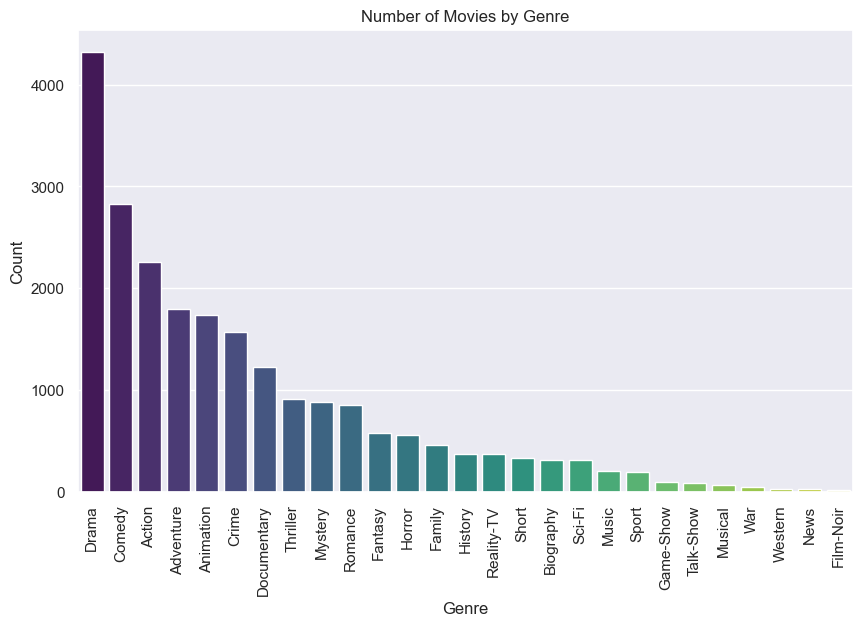

In [25]:
# Clean and count unique genres
newData = movies['GENRE'].str.split(', ')
unique_genres = newData.explode().str.strip().unique()
genre_counts = newData.explode().str.strip().value_counts()
print(unique_genres,genre_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Number of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

C:\Users\sraad\AppData\Local\Temp\ipykernel_20084\689714324.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


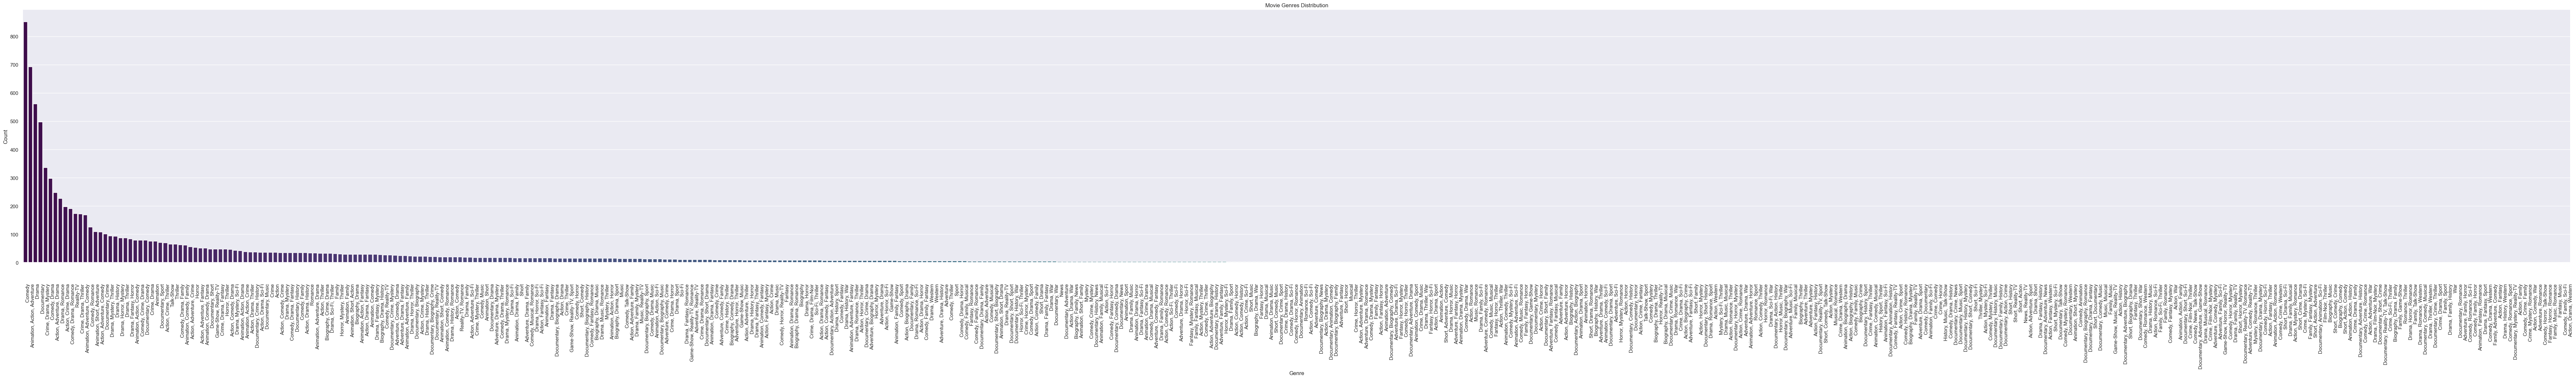

C:\Users\sraad\AppData\Local\Temp\ipykernel_20084\689714324.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre, x='GENRE', y='RATING', palette='viridis')


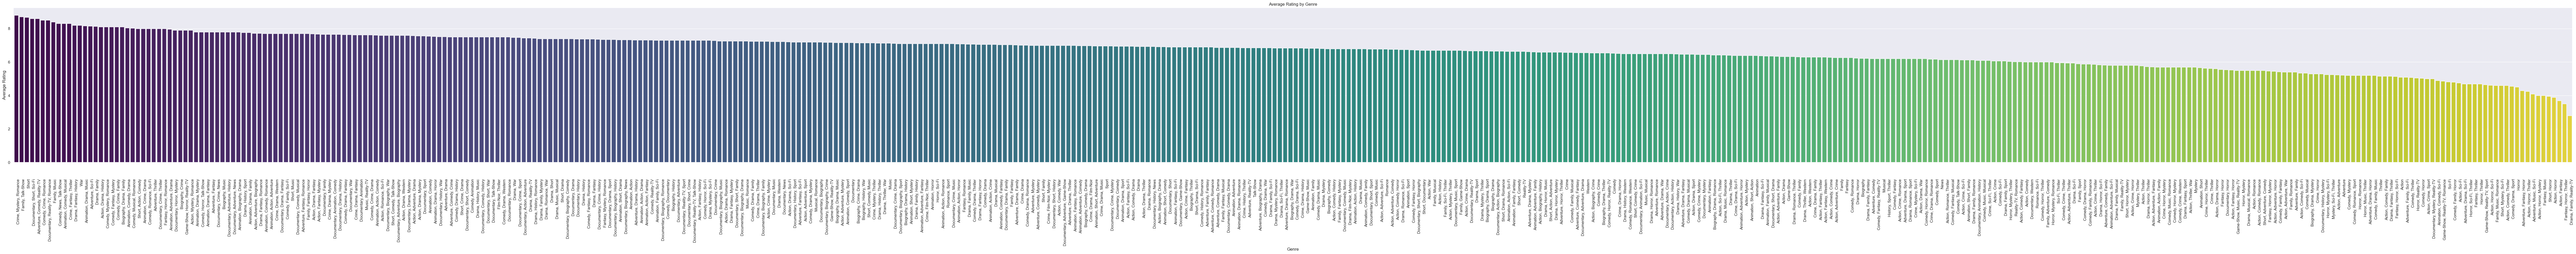

In [27]:
genre_data = movies['GENRE']

# Count the occurrences of each genre
genre_counts = genre_data.value_counts()

# Create a bar chart
plt.figure(figsize=(100, 10))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Movie Genres Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Assuming 'movies' is your DataFrame containing the movie data

# Clean and count unique genres
newData = movies['GENRE'].str.split(', ')
unique_genres = newData.explode().str.strip().unique()
genre_counts = newData.explode().str.strip().value_counts()

# Remove rows where 'GENRE' or 'RATING' is missing
movies_cleaned = movies.dropna(subset=['GENRE', 'RATING'])

# Calculate average rating for each genre
average_rating_by_genre = movies_cleaned.groupby('GENRE')['RATING'].mean().reset_index()

# Sort genres by average rating
average_rating_by_genre = average_rating_by_genre.sort_values(by='RATING', ascending=False)

# Create a bar plot of Genre vs Average Rating
plt.figure(figsize=(100, 10))
sns.barplot(data=average_rating_by_genre, x='GENRE', y='RATING', palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



Categorical Features: ['Title', 'Genre']
Numerical Features: ['Rating', 'Votes', 'Runtime']

Percentage of missing values in categorical features:
Title    0.000000
Genre    0.848749
dtype: float64

Percentage of missing values in numerical features:
Rating      0.000000
Votes       0.000000
Runtime    24.472252
dtype: float64


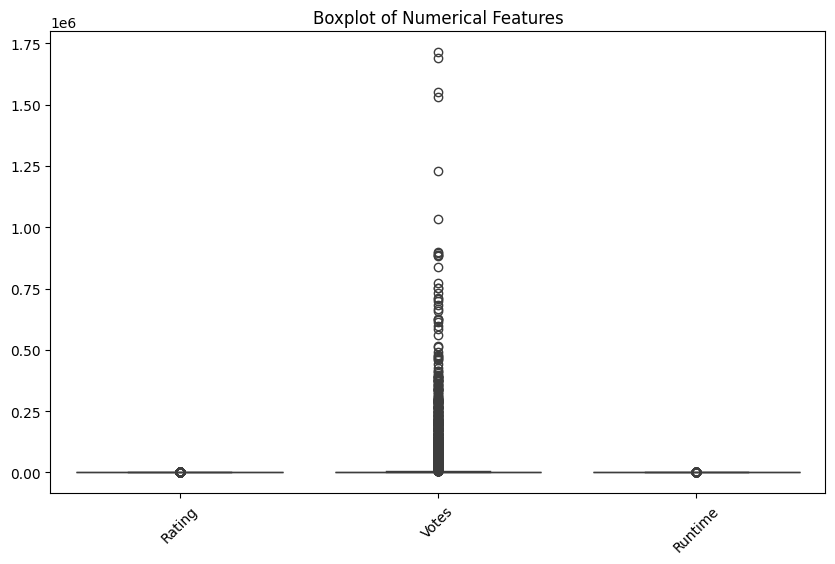

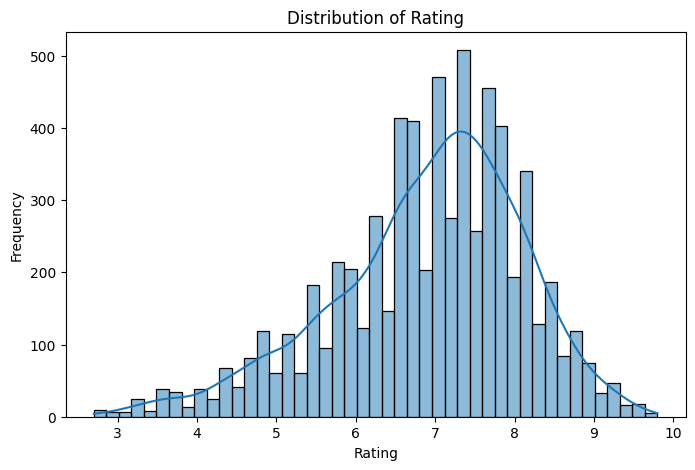

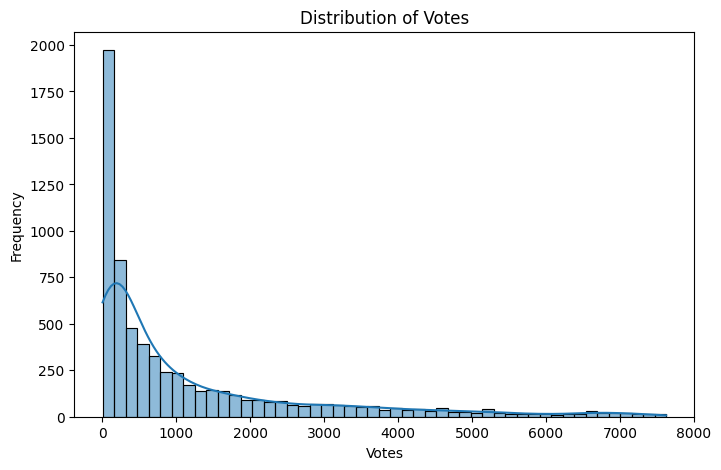

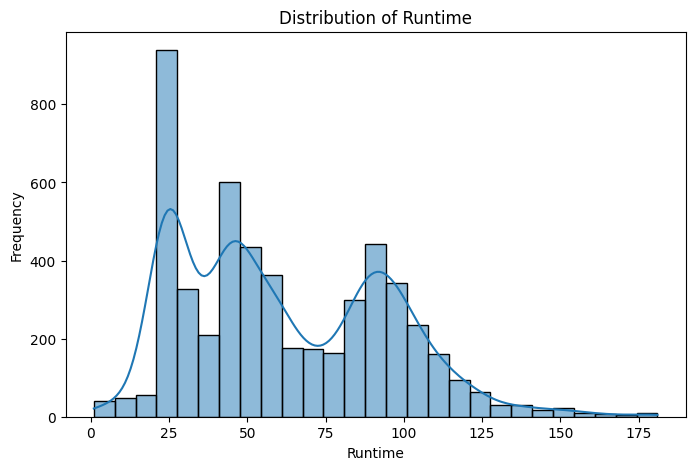

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("movies_result1.csv")  # Update 'your_dataset.csv' with your dataset file name

# List the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# Identify the percentage of missing values
missing_categorical = df[categorical_features].isnull().mean() * 100
missing_numerical = df[numerical_features].isnull().mean() * 100

print("\nPercentage of missing values in categorical features:")
print(missing_categorical)
print("\nPercentage of missing values in numerical features:")
print(missing_numerical)

# Examine the spread of numerical data and identify outliers using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Handle outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Distribution plot
for feature in numerical_features:
     plt.figure(figsize=(8, 5))
     sns.histplot(df_cleaned[feature], kde=True)
     plt.title(f"Distribution of {feature}")
     plt.xlabel(feature)
     plt.ylabel("Frequency")
     plt.show()

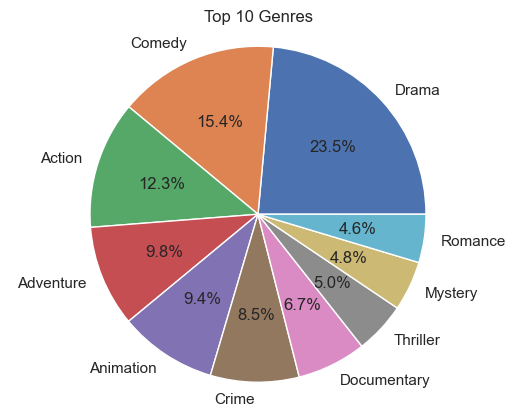

In [ ]:
fig, ax = plt.subplots()
ax.pie(genre_counts[:10], labels=genre_counts[:10].index, autopct='%1.1f%%', startangle=0)
ax.axis('equal')

ax.set_title('Top 10 Genres')
plt.show()

In [ ]:
print(movies.columns)

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross', 'AvgRuntime', 'RuntimeCategory'],
      dtype='object')


C:\Users\sraad\AppData\Local\Temp\ipykernel_17012\1659615356.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_runtime_by_vote_runtime_category = movies.groupby(['VoteCategory', 'RuntimeCategory'])['RunTime'].mean().reset_index()


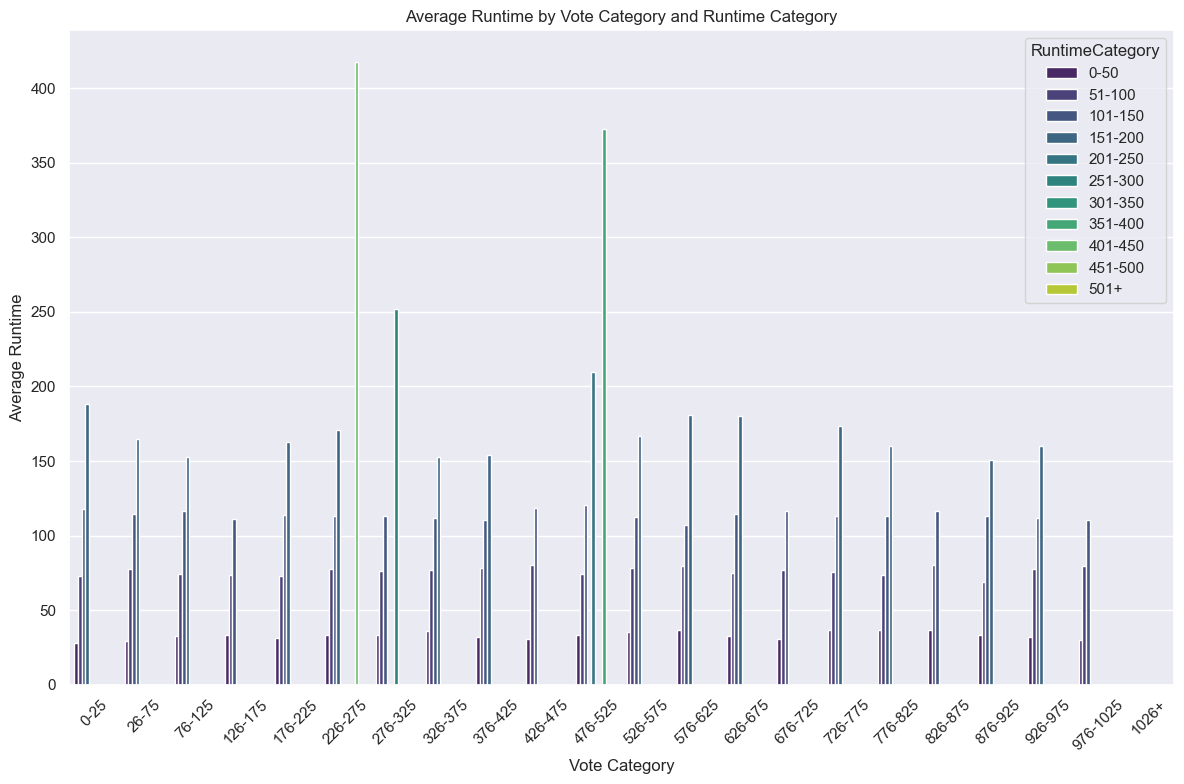

In [ ]:
# Assuming 'movies' is your DataFrame containing the movie data

# Convert 'VOTES' column to numeric type
movies['VOTES'] = pd.to_numeric(movies['VOTES'], errors='coerce')

# Define bins for votes with incremental steps
bins = [0, 25, 75, 125, 175, 225, 275, 325, 375, 425, 475, 525, 575, 625, 675, 725, 775, 825, 875, 925, 975, 1025, np.inf]
labels = ['0-25', '26-75', '76-125', '126-175', '176-225', '226-275', '276-325', '326-375', '376-425', '426-475', '476-525', '526-575', '576-625', '626-675', '676-725', '726-775', '776-825', '826-875', '876-925', '926-975', '976-1025', '1026+']

# Categorize movies into bins based on votes
movies['VoteCategory'] = pd.cut(movies['VOTES'], bins=bins, labels=labels)

# Define bins for average runtime with incremental steps
runtime_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, np.inf]
runtime_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501+']

# Categorize movies into bins based on average runtime
movies['RuntimeCategory'] = pd.cut(movies['RunTime'], bins=runtime_bins, labels=runtime_labels)

# Group by vote category and runtime category, and calculate the mean of average runtime
average_runtime_by_vote_runtime_category = movies.groupby(['VoteCategory', 'RuntimeCategory'])['RunTime'].mean().reset_index()

# Create a bar plot for Voting vs Average Runtime
plt.figure(figsize=(12, 8))
sns.barplot(data=average_runtime_by_vote_runtime_category, x='VoteCategory', y='RunTime', hue='RuntimeCategory', palette='viridis')
plt.title('Average Runtime by Vote Category and Runtime Category')
plt.xlabel('Vote Category')
plt.ylabel('Average Runtime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\sraad\AppData\Local\Temp\ipykernel_17012\1781290463.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_by_vote_category = movies.groupby('VoteCategory')['RATING'].mean().reset_index()
C:\Users\sraad\AppData\Local\Temp\ipykernel_17012\1781290463.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_vote_category, x='VoteCategory', y='RATING', palette='viridis')


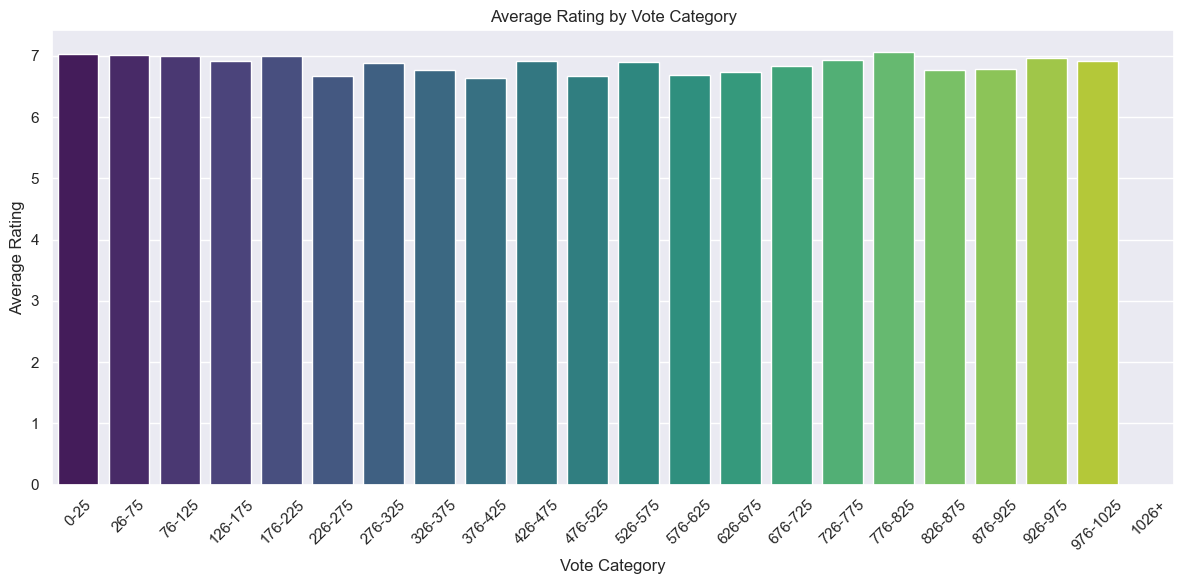

In [ ]:
# Assuming 'movies' is your DataFrame containing the movie data

# Convert 'VOTES' column to numeric type
movies['VOTES'] = pd.to_numeric(movies['VOTES'], errors='coerce')

# Define bins for votes with incremental steps
bins = [0, 25, 75, 125, 175, 225, 275, 325, 375, 425, 475, 525, 575, 625, 675, 725, 775, 825, 875, 925, 975, 1025, np.inf]
labels = ['0-25', '26-75', '76-125', '126-175', '176-225', '226-275', '276-325', '326-375', '376-425', '426-475', '476-525', '526-575', '576-625', '626-675', '676-725', '726-775', '776-825', '826-875', '876-925', '926-975', '976-1025', '1026+']

# Categorize movies into bins based on votes
movies['VoteCategory'] = pd.cut(movies['VOTES'], bins=bins, labels=labels)

# Group by vote category and calculate the average rating
average_rating_by_vote_category = movies.groupby('VoteCategory')['RATING'].mean().reset_index()

# Create a bar plot of Vote Category vs Average Rating
plt.figure(figsize=(12, 6))
sns.barplot(data=average_rating_by_vote_category, x='VoteCategory', y='RATING', palette='viridis')
plt.title('Average Rating by Vote Category')
plt.xlabel('Vote Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


C:\Users\sraad\AppData\Local\Temp\ipykernel_17012\267591344.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movie_count_by_runtime_category, x='RuntimeCategory', y='MovieCount', palette='viridis')


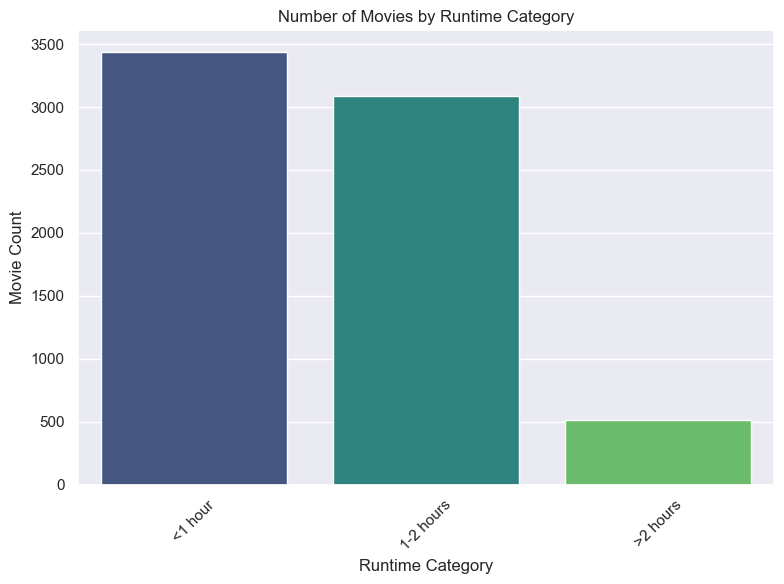

In [ ]:
import numpy as np

# Assuming 'movies' is your DataFrame containing the movie data

# Define bins for runtime
bins = [0, 60, 120, np.inf]
labels = ['<1 hour', '1-2 hours', '>2 hours']

# Categorize movies into bins based on runtime
movies['RuntimeCategory'] = pd.cut(movies['RunTime'], bins=bins, labels=labels, right=False)

# Count the number of movies in each runtime category
movie_count_by_runtime_category = movies['RuntimeCategory'].value_counts().reset_index()
movie_count_by_runtime_category.columns = ['RuntimeCategory', 'MovieCount']

# Create a bar plot of Runtime Category vs Movie Count
plt.figure(figsize=(8, 6))
sns.barplot(data=movie_count_by_runtime_category, x='RuntimeCategory', y='MovieCount', palette='viridis')
plt.title('Number of Movies by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


C:\Users\sraad\AppData\Local\Temp\ipykernel_17012\1581186649.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_by_runtime_category = movies.groupby('RuntimeCategory')['RATING'].mean().reset_index()
C:\Users\sraad\AppData\Local\Temp\ipykernel_17012\1581186649.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_runtime_category, x='RuntimeCategory', y='RATING', palette='viridis')


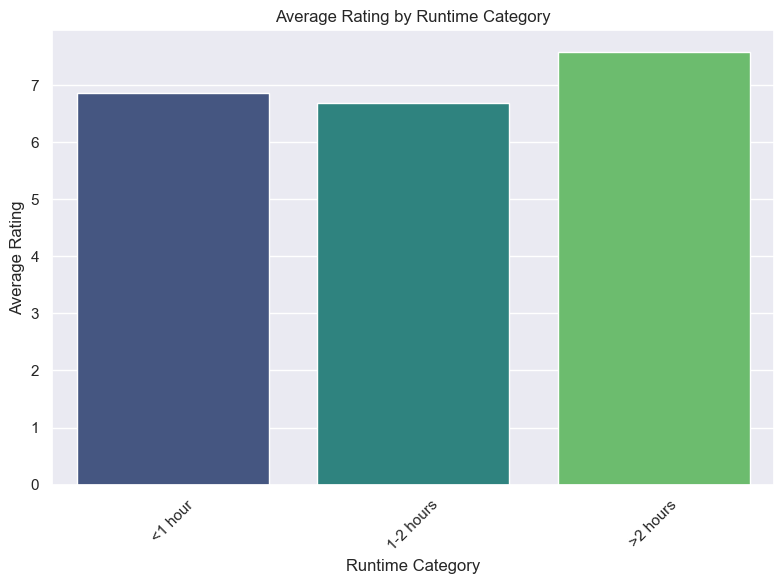

In [ ]:
import numpy as np

# Assuming 'movies' is your DataFrame containing the movie data

# Calculate average runtime for each movie
movies['AvgRuntime'] = (movies['RunTime'] + movies['RATING']) / 2

# Define bins for runtime
bins = [0, 60, 120, np.inf]
labels = ['<1 hour', '1-2 hours', '>2 hours']

# Categorize movies into bins based on average runtime
movies['RuntimeCategory'] = pd.cut(movies['AvgRuntime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each runtime category
average_rating_by_runtime_category = movies.groupby('RuntimeCategory')['RATING'].mean().reset_index()

# Create a bar plot of Runtime Category vs Average Rating
plt.figure(figsize=(8, 6))
sns.barplot(data=average_rating_by_runtime_category, x='RuntimeCategory', y='RATING', palette='viridis')
plt.title('Average Rating by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
